In [1]:
#Machine Learning - Multiple Regression

import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O

In [2]:
df=pd.read_csv('antenna.csv')

In [3]:
df=df.dropna()
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 509 rows and 13 columns


In [4]:
df.head()

,Wm,W0m,dm,tm,rows,Xa,Ya,gain,vswr,bandwidth,s,pr,p0
0,2142.9,162.86,77.143,214.29,3.0,3543.5,2142.9,2.799175,1.372040,110.6698,-16.090654,0.204248,0.483952
1,2142.9,162.86,77.143,214.29,3.0,3543.5,6964.3,2.817305,1.638103,120.7497,-12.328015,0.197374,0.464289
2,2142.9,162.86,351.430,214.29,5.0,8365.0,6964.3,2.941413,1.242714,123.6901,-19.313586,0.212885,0.490808
3,2142.9,162.86,351.430,214.29,3.0,8365.0,2142.9,2.844078,1.242587,122.4301,-19.317644,0.212405,0.496603
4,2142.9,162.86,351.430,214.29,3.0,8365.0,6964.3,2.812315,1.271176,124.3198,-18.459992,0.207997,0.489240


In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [6]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename='meta material antenna'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

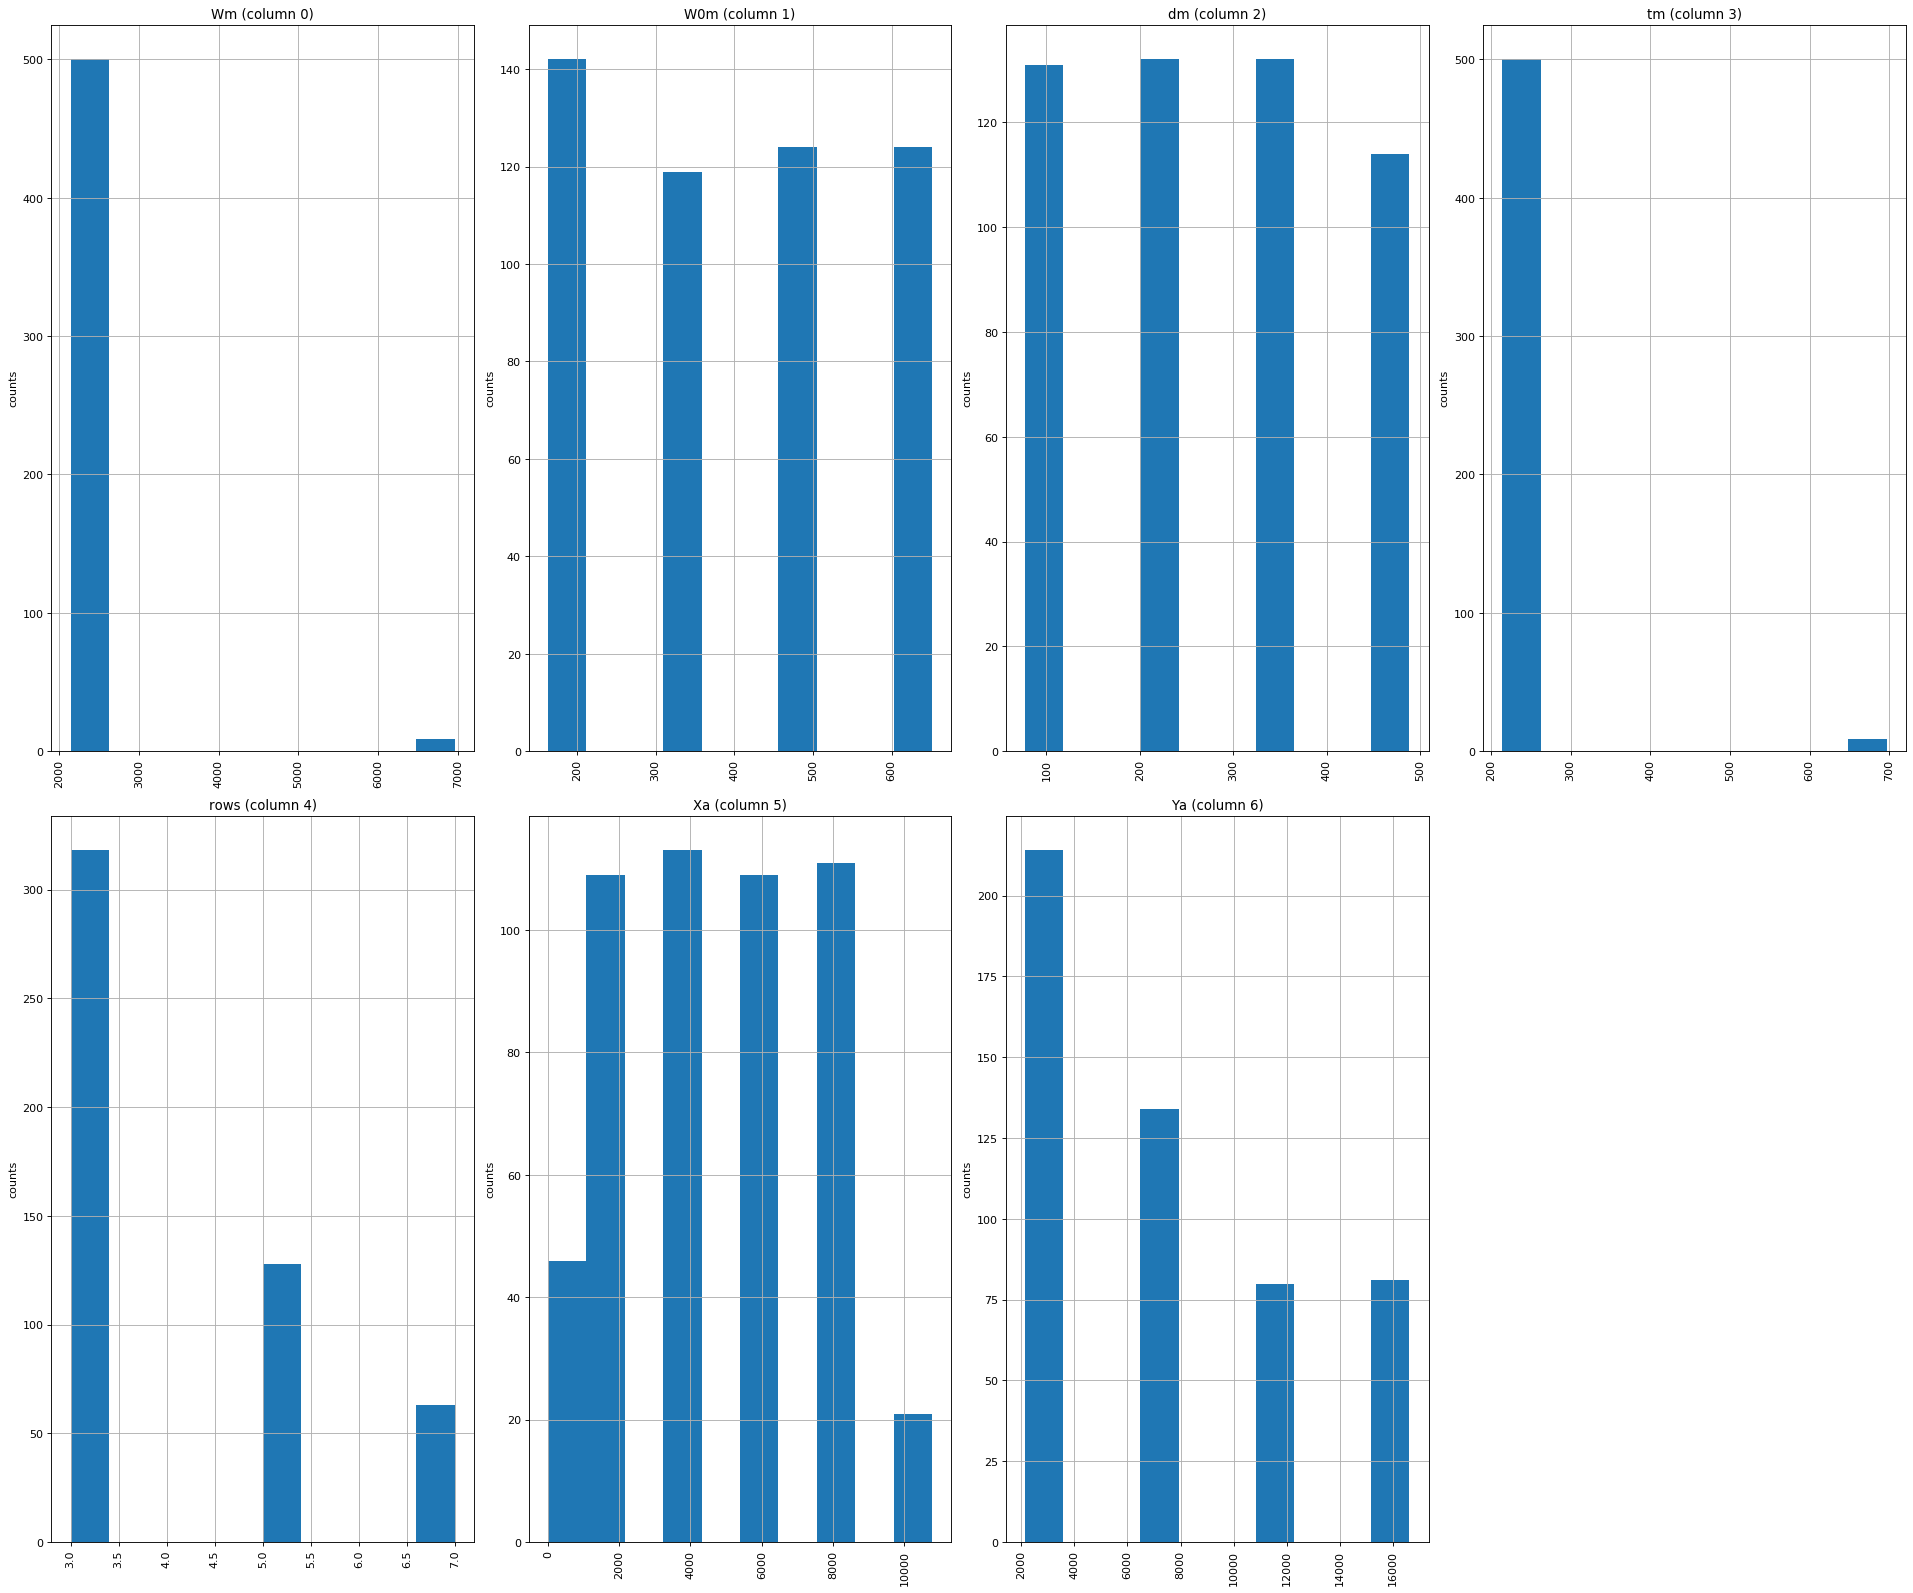

In [7]:
plotPerColumnDistribution(df, 10, 4)

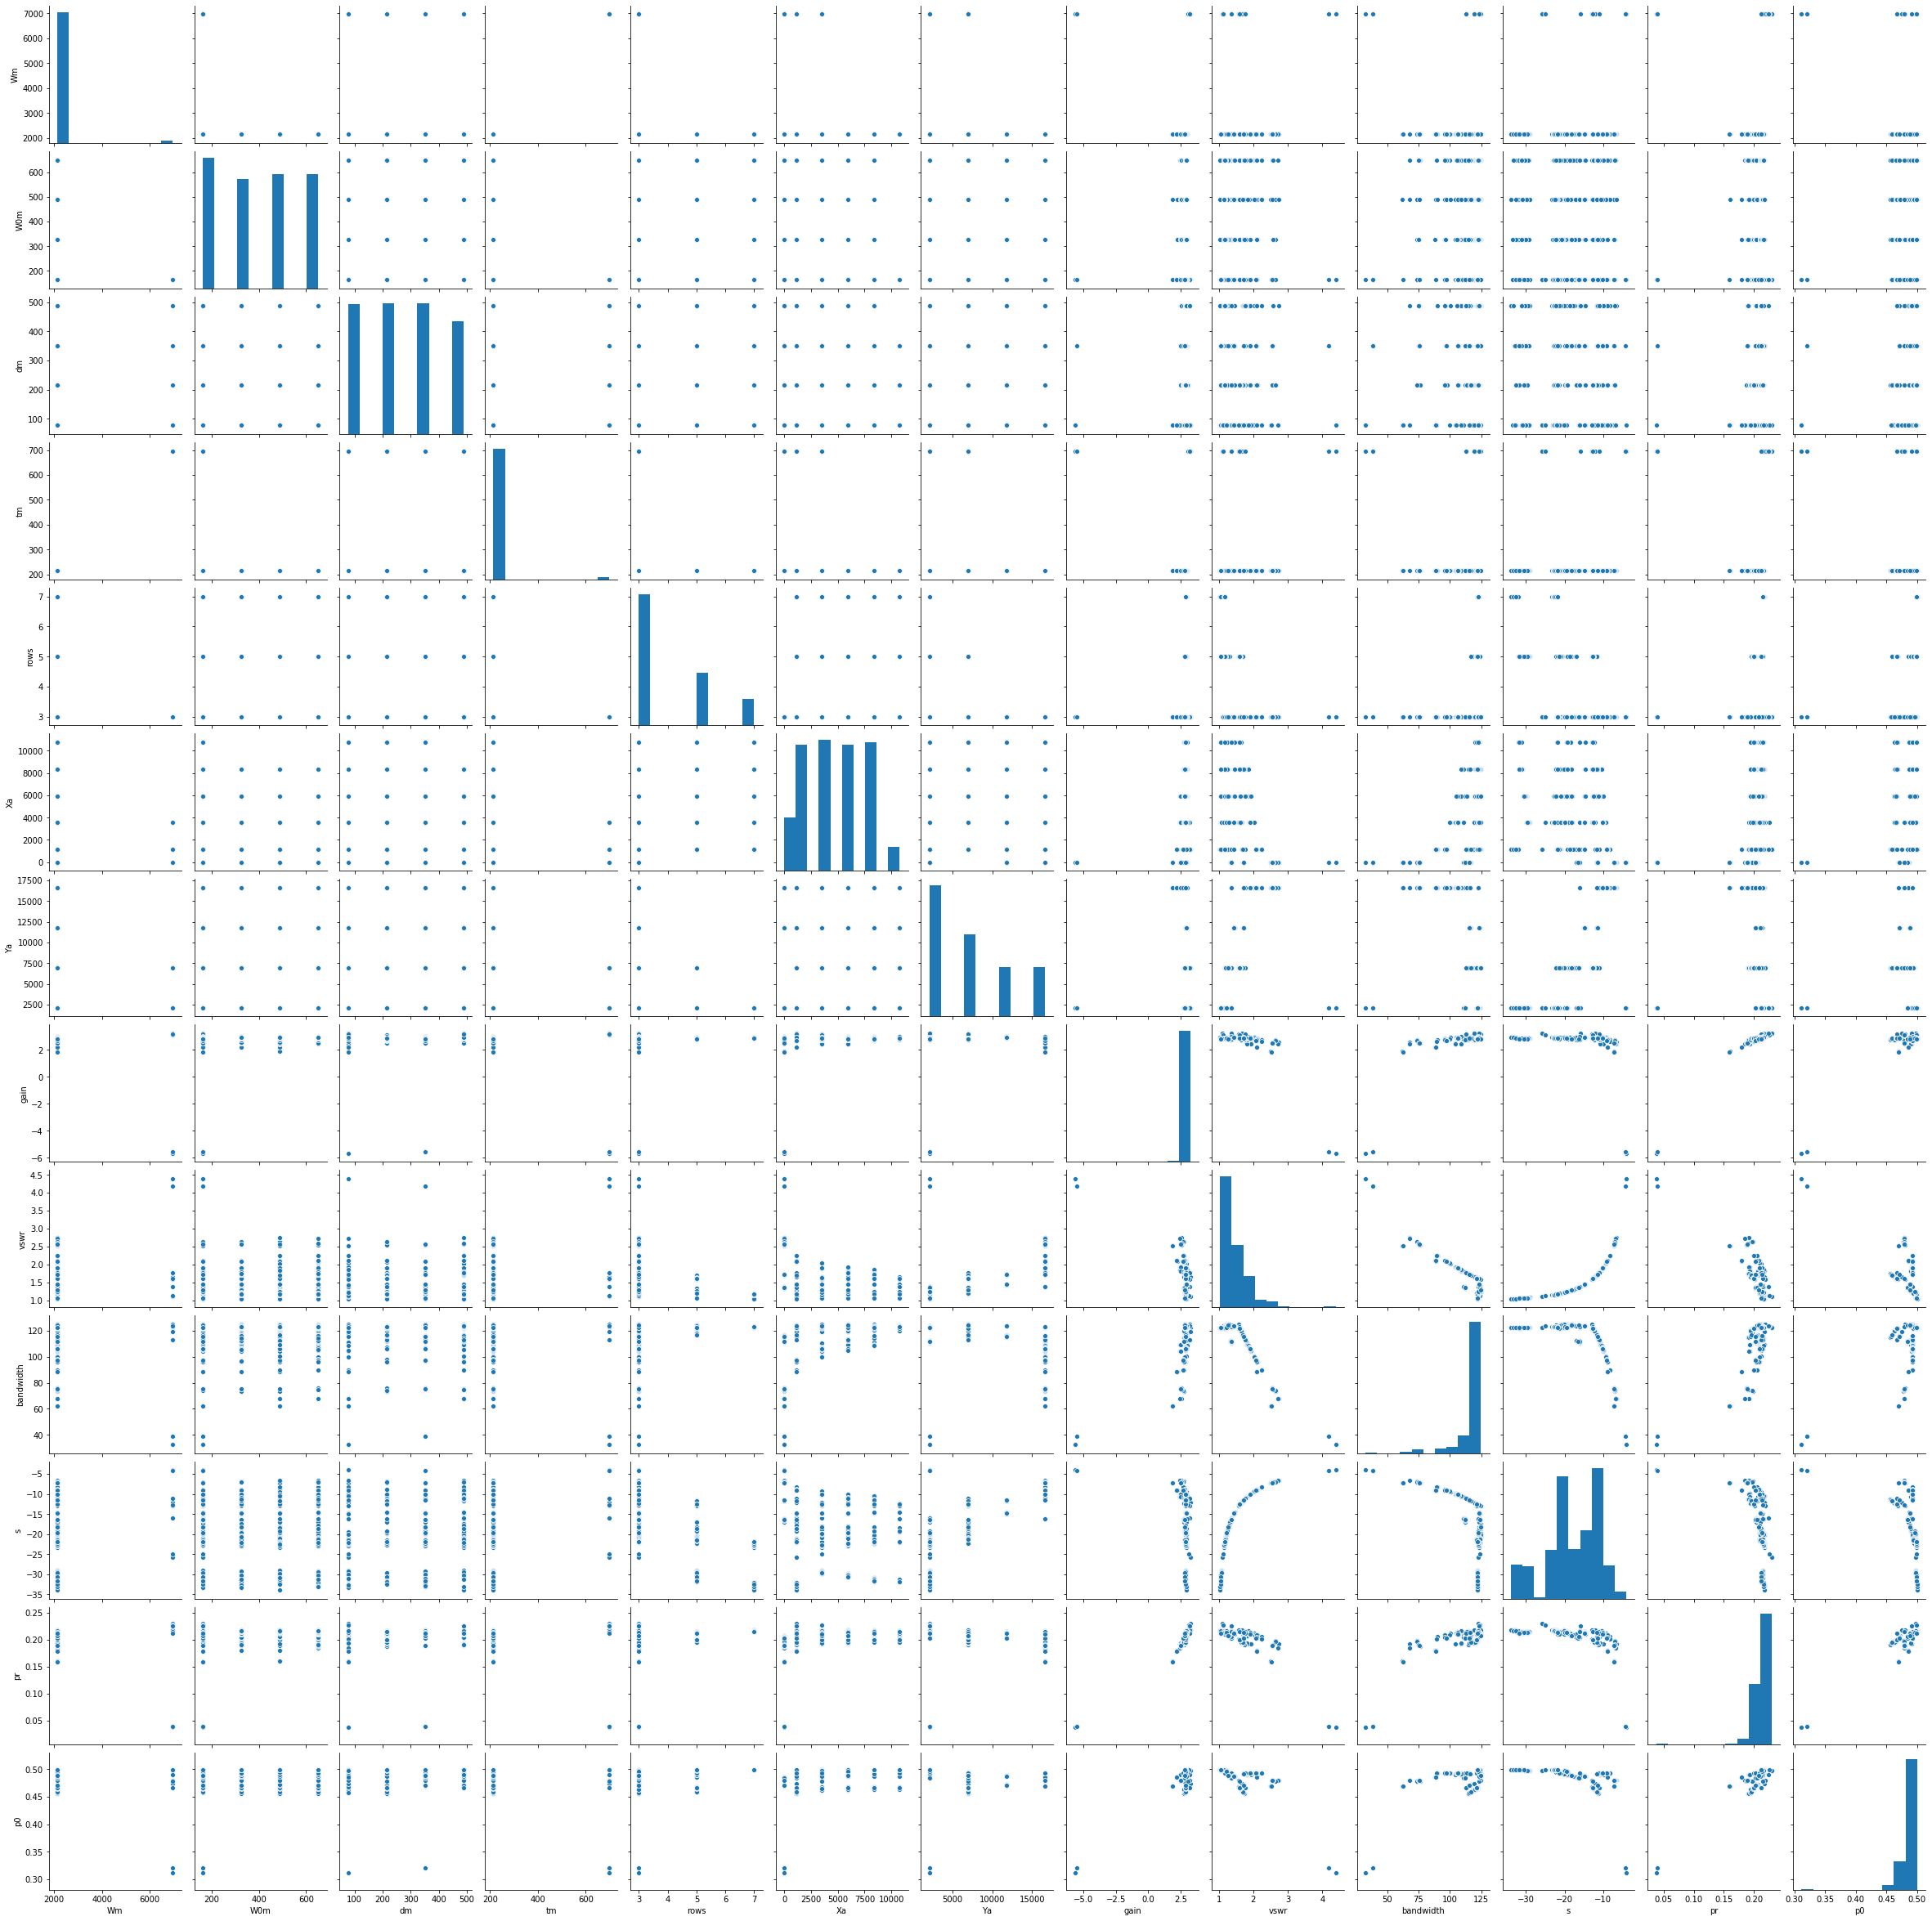

In [8]:
import seaborn as sns

sns.pairplot(df)

In [9]:
#data Correlation
df.corr()

,Wm,W0m,dm,tm,rows,Xa,Ya,gain,vswr,bandwidth,s,pr,p0
Wm,1.000000,-0.171309,-0.054871,1.000000,-0.094915,-0.123847,-0.074435,-0.395668,0.225925,-0.182720,0.081740,-0.286041,-0.348246
W0m,-0.171309,1.000000,0.069928,-0.171309,0.037296,-0.105214,0.009966,0.087153,-0.033586,0.015603,-0.022329,0.085918,0.072048
dm,-0.054871,0.069928,1.000000,-0.054871,-0.041206,-0.056356,0.026619,0.055133,-0.098094,0.039560,-0.088353,0.160868,0.200659
tm,1.000000,-0.171309,-0.054871,1.000000,-0.094915,-0.123847,-0.074435,-0.395668,0.225925,-0.182720,0.081740,-0.286041,-0.348246
rows,-0.094915,0.037296,-0.041206,-0.094915,1.000000,0.110556,-0.516235,0.084706,-0.441026,0.262781,-0.604748,0.217393,0.241406
Xa,-0.123847,-0.105214,-0.056356,-0.123847,0.110556,1.000000,-0.075075,0.136164,-0.274685,0.368560,-0.167747,0.225856,0.180020
Ya,-0.074435,0.009966,0.026619,-0.074435,-0.516235,-0.075075,1.000000,0.002800,0.694198,-0.486391,0.758681,-0.184268,-0.178931
gain,-0.395668,0.087153,0.055133,-0.395668,0.084706,0.136164,0.002800,1.000000,-0.555780,0.579664,-0.187028,0.882747,0.698580
vswr,0.225925,-0.033586,-0.098094,0.225925,-0.441026,-0.274685,0.694198,-0.555780,1.000000,-0.876347,0.813835,-0.747752,-0.666521
bandwidth,-0.182720,0.015603,0.039560,-0.182720,0.262781,0.368560,-0.486391,0.579664,-0.876347,1.000000,-0.520604,0.688038,0.429216


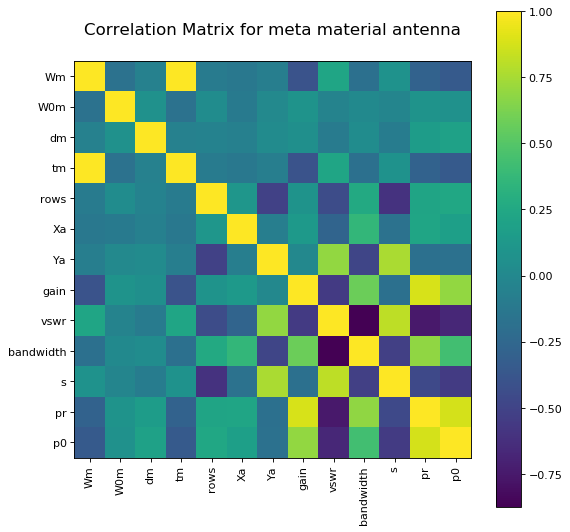

In [10]:
plotCorrelationMatrix(df, 8)

In [11]:
#our dependent and independent variable

X= df[['Xa', 'Ya']]
Y=df['bandwidth']

X,Y = np.array(X), np.array(Y)

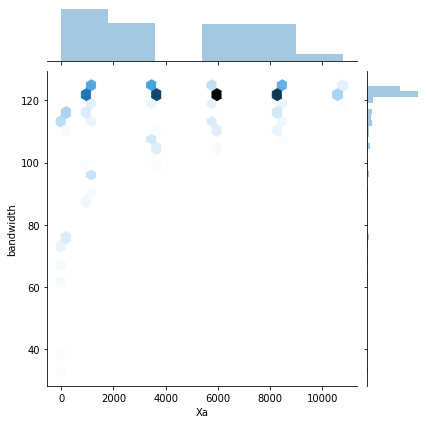

In [12]:
# data visulization

sns.jointplot(df['Xa'],df['bandwidth'],kind='hex')

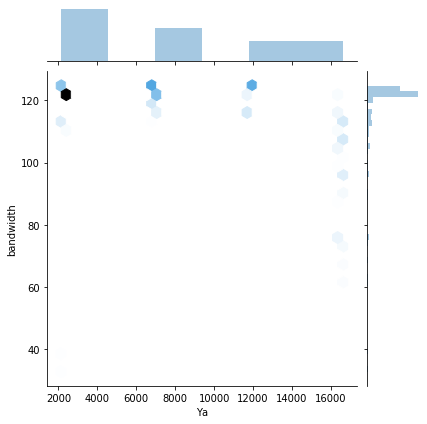

In [13]:
sns.jointplot(df['Ya'],df['bandwidth'],kind='hex')

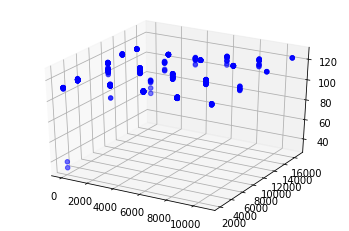

In [14]:
# 3D plot

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
i=df['Xa']
j=df['Ya']
k=df['bandwidth']
ax.scatter3D(i, j, k, c='blue');

In [15]:
##Multiple Linear Regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X , Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
r_sq=regr.score(X,Y)
print('coefficient of determination:',r_sq,'\n')
if r_sq>0.5:
    print('Multiple Linear Regression is good for this data')
else:
    print('the other methods can be more useful')

coefficient of determination: 0.3474544174216285 

the other methods can be more useful


In [17]:
#Polynomial Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## degree = 2
###Transform input data
x_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

###Create a model and fit it
model2=LinearRegression().fit(x_2,Y)

In [18]:
###get results (degree=2)
r_sq=model2.score(x_2,Y)
intercept, coefficients = model2.intercept_,model2.coef_

print('r_squered is : ',r_sq)
print('intercept is : ',intercept)
print('the coefficients is: ',coefficients)

r_squered is :  0.6181465645700557
intercept is :  112.42000066802518
the coefficients is:  [ 2.36438017e-03  1.86669051e-03 -2.53579655e-07  1.64361687e-07
 -2.00632938e-07]


In [19]:
## degree = 3
x_3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

model3=LinearRegression().fit(x_3,Y)


In [20]:
###get results (degree=3)
r_sq=model3.score(x_3,Y)
intercept, coefficients = model3.intercept_,model3.coef_

print('r_squered is : ',r_sq)
print('intercept is : ',intercept)
print('the coefficients is: ',coefficients)

r_squered is :  0.7541097920340005
intercept is :  113.12948124650052
the coefficients is:  [ 8.21820542e-03 -2.28343483e-03 -1.32987714e-06 -4.28270322e-07
  6.02203195e-07  7.33975662e-11 -8.46543924e-12  3.71507856e-11
 -3.54513367e-11]


In [21]:
## degree = 4
x_4 = PolynomialFeatures(degree=4, include_bias=False).fit_transform(X)

model4=LinearRegression().fit(x_4,Y)


In [22]:
###get results (degree=4)
r_sq=model4.score(x_4,Y)
intercept, coefficients = model4.intercept_,model4.coef_

print('r_squered is : ',r_sq)
print('intercept is : ',intercept)
print('the coefficients is: ',coefficients)

r_squered is :  0.7998148091977761
intercept is :  107.01095727296126
the coefficients is:  [ 1.61814587e-02  1.22059580e-05 -5.08377403e-06  2.85192491e-07
 -2.77269031e-07  5.86311293e-10  6.01538810e-11 -1.13511558e-10
  7.05621557e-11 -2.36715732e-14  5.30039006e-16 -4.09461322e-15
  6.80846590e-15 -3.67486812e-15]


In [23]:
# train/test


#80% training_set     /    20% testing_set
tx1=X[:int(0.4*509)]
tx2=X[int(0.6*509):]
train_x=np.concatenate((tx1, tx2))

ty1=Y[:int(0.4*509)]
ty2=Y[int(0.6*509):]
train_y=np.concatenate((ty1, ty2))

test_x=X[int(0.4*509):int(0.6*509)]
test_y=Y[int(0.4*509):int(0.6*509)]


In [24]:
##degree=2 (train/test)

###Transform input data
train_x2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(train_x)
test_x2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test_x)

###Create a model and fit it
n_model2=LinearRegression().fit(train_x2,train_y)

###get results (train/test) (degree=2)
r_sq=n_model2.score(test_x2,test_y)

intercept, coefficients = n_model2.intercept_,model2.coef_

print('r_squered is : ',r_sq)
print('intercept is : ',intercept)
print('the coefficients is: ',coefficients)

r_squered is :  0.7613439834149935
intercept is :  111.65866360233889
the coefficients is:  [ 2.36438017e-03  1.86669051e-03 -2.53579655e-07  1.64361687e-07
 -2.00632938e-07]


In [25]:
##degree=3 (train/test)

###Transform input data
train_x3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(train_x)
test_x3 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(test_x)

###Create a model and fit it
n_model3=LinearRegression().fit(train_x3,train_y)

###get results (train/test) (degree=3)
r_sq=n_model3.score(test_x3,test_y)

intercept, coefficients = n_model3.intercept_,model3.coef_

print('r_squered is : ',r_sq)
print('intercept is : ',intercept)
print('the coefficients is: ',coefficients)

r_squered is :  0.8993607256178735
intercept is :  111.61356637305735
the coefficients is:  [ 8.21820542e-03 -2.28343483e-03 -1.32987714e-06 -4.28270322e-07
  6.02203195e-07  7.33975662e-11 -8.46543924e-12  3.71507856e-11
 -3.54513367e-11]


In [26]:
##degree=4 (train/test)

###Transform input data
train_x4 = PolynomialFeatures(degree=4, include_bias=False).fit_transform(train_x)
test_x4 = PolynomialFeatures(degree=4, include_bias=False).fit_transform(test_x)

###Create a model and fit it
n_model4=LinearRegression().fit(train_x4,train_y)

###get results (train/test) (degree=4)
r_sq=n_model4.score(test_x4,test_y)

intercept, coefficients = n_model4.intercept_,model4.coef_

print('r_squered is : ',r_sq)
print('intercept is : ',intercept)
print('the coefficients is: ',coefficients)


r_squered is :  0.931506606031902
intercept is :  105.22239777956857
the coefficients is:  [ 1.61814587e-02  1.22059580e-05 -5.08377403e-06  2.85192491e-07
 -2.77269031e-07  5.86311293e-10  6.01538810e-11 -1.13511558e-10
  7.05621557e-11 -2.36715732e-14  5.30039006e-16 -4.09461322e-15
  6.80846590e-15 -3.67486812e-15]


In [27]:
##degree=4 (predict)

k=np.array([[5700, 6482]])
###Transform input data
k = PolynomialFeatures(degree=4, include_bias=False).fit_transform(k)

predicted = n_model4.predict(k)
print(predicted)

[120.34040699]


In [28]:
xs=np.linspace(2500,9000,1000)
ys=np.linspace(3500,13000,1000)


In [29]:
#predicting the data

mesh = np.array(np.meshgrid(xs, ys))
combinations = mesh.T.reshape(-1, 2)
combinations.shape


(1000000, 2)

In [30]:
###Transform input data
k = PolynomialFeatures(degree=4, include_bias=False).fit_transform(combinations)

predicted = n_model4.predict(k)
predicted.shape

(1000000,)

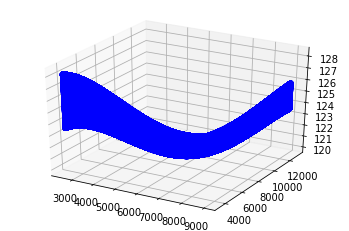

In [31]:
# 3D plot

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
i=np.linspace(2500,9000,1000000)
j=np.linspace(3500,13000,1000000)
k=predicted
ax.scatter3D(i, j, k, c='blue');

In [39]:
y1 = np.asarray(df['bandwidth'], dtype="|S6")


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X= scaler.transform(X)

In [42]:
# neural network model

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(2,2,2),max_iter=500)
mlp.fit(X,y1)

C:\Users\amxja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [47]:
# predicting the data
print(mlp.predict([[0.523,0.345]]))

[b'123.48']


In [ ]:
#this is the END, the END, the END